In [ ]:
pip install langgraph langchain langchain_community langchainhub langchain_groq langchain_huggingface bs4 tiktoken chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.5/136.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.3 MB/s eta 0:00:00


In [ ]:
import sqlite3

In [ ]:
connection = sqlite3.connect("mydb.db")

In [ ]:
table_creation_query="""
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    hire_date TEXT NOT NULL,
    salary REAL NOT NULL
);
"""

In [ ]:
table_creation_query2="""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT NOT NULL
);
"""

In [ ]:
table_creation_query3="""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date DATE NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);
"""

In [ ]:
cursor = connection.cursor()

In [ ]:
cursor.execute(table_creation_query)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [ ]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [ ]:
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
  ]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [ ]:
cursor.executemany(insert_query, employee_data)
cursor.executemany(insert_query_customers, customers_data)
cursor.executemany(insert_query_orders, orders_data)

In [ ]:
connection.commit()

In [ ]:
cursor.execute('select * from orders')

In [ ]:
for row in cursor.fetchall():
  print(row)

(1, 1, '2023-12-01', 250.75)
(2, 2, '2023-11-20', 150.5)
(3, 3, '2023-11-25', 300.0)
(4, 4, '2023-12-02', 450.0)


In [ ]:
from langchain_community.utilities import SQLDatabase

In [ ]:
db = SQLDatabase.from_uri("sqlite:///mydb.db")

In [ ]:
db.dialect   # provider info as many exists like MySQL etc

'sqlite'

In [ ]:
db.get_usable_table_names()

['customers', 'employees', 'orders']

In [ ]:
from langchain_groq import ChatGroq
import os
os.environ["GROQ_API_KEY"] = ''
llm = ChatGroq(model = 'llama3-70b-8192')

In [ ]:
llm.invoke("Who are you ?")

AIMessage(content="I am LLaMA, an AI assistant developed by Meta AI that can understand and respond to human input in a conversational manner. I'm not a human, but a computer program designed to simulate conversation, answer questions, and even generate text based on the input I receive.\n\nI'm a large language model, which means I've been trained on a massive dataset of text from various sources, including books, articles, and online conversations. This training enables me to understand and respond to a wide range of topics and questions, from science and history to entertainment and culture.\n\nI'm constantly learning and improving, so please bear with me if I make any mistakes or don't quite understand what you're asking. I'm here to help and provide information to the best of my abilities!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 157, 'prompt_tokens': 14, 'total_tokens': 171, 'completion_time': 0.448571429, 'prompt_time': 0.000234288, 'queue_t

In [ ]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit
toolkit = SQLDatabaseToolkit(db=db,llm=llm)

In [ ]:
tools = toolkit.get_tools()

In [ ]:
for tool in tools:
  print(tool.name,":",tool.description)

sql_db_query : Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.
sql_db_schema : Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3
sql_db_list_tables : Input is an empty string, output is a comma-separated list of tables in the database.
sql_db_query_checker : Use this tool to double check if your query is correct before executing it. Always use this tool before executing a query with sql_db_query!


In [ ]:
# here we are getting the sql_db_list_tables tool
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)

In [ ]:
list_tables_tool

ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x7c940c353610>)

In [ ]:
# here we are getting the sql_db_schema  tool
get_schema_tool  = next((tool for tool in tools if tool.name == "sql_db_schema"), None)

In [ ]:
list_tables_tool.invoke('')

'customers, employees, orders'

In [ ]:
print(get_schema_tool.invoke('orders'))


CREATE TABLE orders (
	order_id INTEGER, 
	customer_id INTEGER NOT NULL, 
	order_date DATE NOT NULL, 
	amount REAL NOT NULL, 
	PRIMARY KEY (order_id), 
	FOREIGN KEY(customer_id) REFERENCES customers (customer_id)
)

/*
3 rows from orders table:
order_id	customer_id	order_date	amount
1	1	2023-12-01	250.75
2	2	2023-11-20	150.5
3	3	2023-11-25	300.0
*/


In [ ]:
# we are now using tool decorator from langchain which converts any function into a tool

from langchain_core.tools import tool

@tool
def db_query_tool(query: str) -> str:
    """
    Execute a SQL Query against the database and return the result.
    If the query is not valid or returns no result , an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result = db.run_no_throw(query)
    if not result:
      return "Error : Query failed. Please rewrite your query and try again ."
    return result


In [ ]:
db_query_tool.invoke("select * from orders")

"[(1, 1, '2023-12-01', 250.75), (2, 2, '2023-11-20', 150.5), (3, 3, '2023-11-25', 300.0), (4, 4, '2023-12-02', 450.0)]"

In [ ]:
llm_with_tools=llm.bind_tools([db_query_tool])

In [ ]:
llm_with_tools.invoke("SELECT * FROM Employees;")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_5knb', 'function': {'arguments': '{"query":"SELECT * FROM Employees;"}', 'name': 'db_query_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 948, 'total_tokens': 996, 'completion_time': 0.158205541, 'prompt_time': 0.03086334, 'queue_time': 0.24777937200000003, 'total_time': 0.189068881}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2e0feca3c9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-66eb062c-c74a-4588-8c2c-19d878e87e74-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'SELECT * FROM Employees;'}, 'id': 'call_5knb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 948, 'output_tokens': 48, 'total_tokens': 996})

In [ ]:
from typing import Annotated, Literal
from langchain_core.messages import AIMessage
from pydantic import BaseModel, Field
from typing_extensions import TypedDict
from langgraph.graph import END, StateGraph, START
from langgraph.graph.message import AnyMessage, add_messages
from typing import Any
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda, RunnableWithFallbacks
from langgraph.prebuilt import ToolNode

## Query Check

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

query_check_system = """You are a SQL expert. Carefully review the SQL query for common mistakes, including:

Issues with NULL handling (e.g., NOT IN with NULLs)
Improper use of UNION instead of UNION ALL
Incorrect use of BETWEEN for exclusive ranges
Data type mismatches or incorrect casting
Quoting identifiers improperly
Incorrect number of arguments in functions
Errors in JOIN conditions

If you find any mistakes, rewrite the query to fix them. If it's correct, reproduce it as is."""

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])

check_generated_query = query_check_prompt | llm_with_tools

In [ ]:
check_generated_query.invoke({"messages": [("user", "SELECT +++ FROM Employees LIMITs 5;")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yg9e', 'function': {'arguments': '{"query":"SELECT * FROM Employees LIMIT 5"}', 'name': 'db_query_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 1053, 'total_tokens': 1103, 'completion_time': 0.14704135, 'prompt_time': 0.041186411, 'queue_time': 0.203961239, 'total_time': 0.188227761}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2e0feca3c9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7a9b3319-686d-4dca-94db-08400e2b7058-0', tool_calls=[{'name': 'db_query_tool', 'args': {'query': 'SELECT * FROM Employees LIMIT 5'}, 'id': 'call_yg9e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1053, 'output_tokens': 50, 'total_tokens': 1103})

In [ ]:
class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user")

llm_with_final_answer=llm.bind_tools([SubmitFinalAnswer])

## Query Generation

In [ ]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system_prompt = """You are a SQL expert with a strong attention to detail.Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

  DO NOT call any tool besides SubmitFinalAnswer to submit the final answer.

  When generating the query:

1. Output the SQL query that answers the input question without a tool call.

2. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.

3. You can order the results by a relevant column to return the most interesting examples in the database.

4. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

5. If you get an error while executing a query, rewrite the query and try again.

6. If you get an empty result set, you should try to rewrite the query to get a non-empty result set.

7. NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

8. If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

9. DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer.

10. rewrite this prompt with very simple english and little shorter manner also """

query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system_prompt), ("placeholder", "{messages}")])

query_generator = query_gen_prompt | llm_with_final_answer


In [ ]:
query_generator.invoke({"messages": [("can you fetch 10 data points from employee table?")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wfm5', 'function': {'arguments': '{"final_answer":"SELECT * FROM employee LIMIT 10"}', 'name': 'SubmitFinalAnswer'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 1230, 'total_tokens': 1281, 'completion_time': 0.180119286, 'prompt_time': 0.047038157, 'queue_time': 0.21158903199999998, 'total_time': 0.227157443}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2e0feca3c9', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-5e91fc40-ef03-4416-a259-616c3aa8b2f6-0', tool_calls=[{'name': 'SubmitFinalAnswer', 'args': {'final_answer': 'SELECT * FROM employee LIMIT 10'}, 'id': 'call_wfm5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1230, 'output_tokens': 51, 'total_tokens': 1281})

In [ ]:
class State(TypedDict):
  messages : Annotated[list[AnyMessage],add_messages]

In [ ]:
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
  return{"messages": [AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}

In [ ]:
# this tool handles the errors
def handle_tool_error(state:State):
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }

In [ ]:
def model_check_query(state:State):
  return {"messages": [query_check_prompt.invoke({"messages":[state["messages"][-1]]})]}

In [ ]:
# basically this is an error function if there is any sort of error then the handle_tool_error will handle it
def create_tool_node_with_fallback(tools:list) -> RunnableWithFallbacks[Any,dict]:
  return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [ ]:
def query_gen_node(state:State):
    message = query_generator.invoke(state)
    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}

In [ ]:
def should_continue(state:State):
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

## Workflow

In [ ]:
workflow = StateGraph(State)

In [ ]:
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool",create_tool_node_with_fallback([list_tables_tool]))
workflow.add_node("get_schema_tool",create_tool_node_with_fallback([get_schema_tool]))
model_get_schema = llm.bind_tools([get_schema_tool])
workflow.add_node("model_get_schema",lambda state : {"messages": [model_get_schema.invoke(state["messages"])],},)
workflow.add_node("query_gen",query_gen_node)
workflow.add_node("correct_query",model_check_query)
workflow.add_node("execute_query",create_tool_node_with_fallback([db_query_tool]))

In [ ]:
workflow.add_edge(START,"first_tool_call")
workflow.add_edge("first_tool_call","list_tables_tool")
workflow.add_edge("list_tables_tool","model_get_schema")
workflow.add_edge("model_get_schema",'get_schema_tool')
workflow.add_edge("get_schema_tool","query_gen")
workflow.add_conditional_edges("query_gen",should_continue,
                               {END:END,
                                "query_gen":"query_gen",
                                "correct_query":"correct_query"})
workflow.add_edge("correct_query","execute_query")
workflow.add_edge("execute_query","query_gen")

In [ ]:
app = workflow.compile()

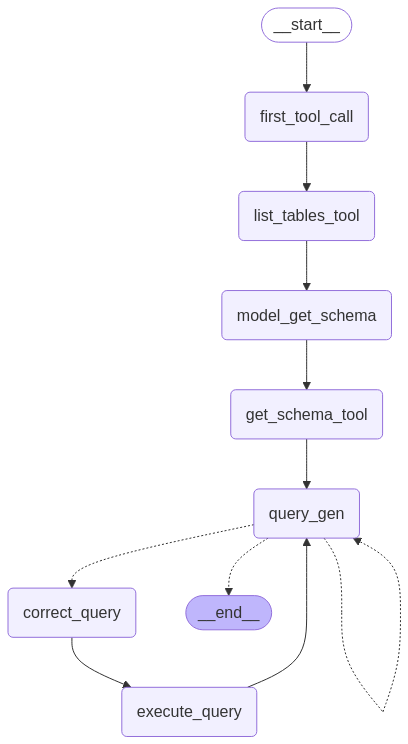

In [ ]:
from IPython.display import Image, display
try:
  display(Image((app.get_graph().draw_mermaid_png())))
except Exception as e:
  print(e)

In [ ]:
query = {"messages":[("user","Tell me name of the employee who's salary is more than 30000 ?")]}

In [ ]:
response = app.invoke(query)

In [ ]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

'Arhun Meheta and Sunny Savita'